In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('/content/travel.csv').dropna()

In [24]:
df.head(3)

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,24636210,2014-11-03 16:02:28,24,2,77,871,36643,456.1151,792280,0,...,0,1,8286,1,0,1,0,63,1258,68
1,19837144,2013-03-13 19:25:01,11,3,205,135,38749,232.4737,961995,0,...,0,1,1842,3,0,1,2,198,786,37
2,13066459,2014-10-13 13:20:25,2,3,66,314,48562,4468.2720,495669,0,...,0,1,8746,1,0,1,6,105,29,22


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63845 entries, 0 to 99999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 63845 non-null  int64  
 1   date_time                  63845 non-null  object 
 2   site_name                  63845 non-null  int64  
 3   posa_continent             63845 non-null  int64  
 4   user_location_country      63845 non-null  int64  
 5   user_location_region       63845 non-null  int64  
 6   user_location_city         63845 non-null  int64  
 7   orig_destination_distance  63845 non-null  float64
 8   user_id                    63845 non-null  int64  
 9   is_mobile                  63845 non-null  int64  
 10  is_package                 63845 non-null  int64  
 11  channel                    63845 non-null  int64  
 12  srch_ci                    63845 non-null  object 
 13  srch_co                    63845 non-null  object 


Data Preprocessing

In [26]:
df['srch_ci'].unique()

array(['2014-12-15', '2013-03-13', '2015-04-03', ..., '2015-12-12',
       '2015-10-15', '2015-11-14'], dtype=object)

In [27]:
df['is_booking'].unique()

array([0, 1])

In [28]:
df['srch_co'].unique()

array(['2014-12-19', '2013-03-14', '2015-04-10', ..., '2015-12-14',
       '2015-10-16', '2015-11-20'], dtype=object)

In [29]:
df['hotel_country'].unique()

array([ 63, 198, 105,  50, 144,  77,   8, 169, 182,  84, 204, 163, 151,
        82,   5,  47,  93,  70, 128, 194,  51, 208, 171,   0,  99, 106,
       168,  48,  52,  22,  34, 130, 196, 146, 180,  96,  87, 104,  67,
       107,  42,  98,  15,  68, 200,  32, 119,  31, 152, 203, 110, 132,
         7,  46, 160, 162, 170, 115, 186,  21, 185, 121, 126, 118, 158,
       135, 140, 159,  12, 127,  80, 211, 122,   1, 103, 136,  55, 157,
        23,  13,  17, 199, 141,  92, 202, 124, 193,  57, 111,  35,  79,
       125, 206, 174,  45, 131,  60, 112, 156, 100,   9, 108,  11, 197,
        25, 153, 102,  78, 147,  53, 139,  81,  36, 212,  19,  89, 129,
       161, 143,  88, 137, 179, 210,  58,   4,  44,  74,  73,  26,  61,
       166,  28, 188,  24,  64,   3,  27,  10, 165,  72,  76, 116,  66,
       192,  20, 114, 101, 201, 148,   2,  83, 154, 189, 181,  71,  38,
        30,  14, 167,  18, 142])

In [30]:
df['hotel_continent'].unique()

array([0, 2, 6, 4, 3, 5])

In [31]:
df['hotel_market'].unique()

array([1258,  786,   29, ..., 1161, 1962,  854])

In [32]:
df['hotel_cluster'].unique()

array([68, 37, 22, 42, 54,  6,  1, 78, 50, 11,  9, 69, 55, 92, 46, 94, 12,
       79, 40, 33,  0, 34, 75, 80,  5, 77, 45, 90, 62, 64, 87, 65, 36, 19,
       89, 28, 21, 91, 23, 56, 59, 57, 15,  3, 98, 31, 83, 17, 67, 47, 85,
       32, 71, 96, 18, 93, 76, 16, 84, 10, 39,  7, 38,  8, 66, 82,  2, 73,
       44, 25, 74, 99, 95, 48, 51, 30, 58,  4, 88, 63, 43, 72, 61, 60, 26,
       14, 52, 20, 53, 41, 97, 86, 81, 49, 70, 29, 24, 13, 35, 27])

In [33]:
df['posa_continent'].unique()

array([2, 3, 1, 0, 4])

In [34]:
df.drop(columns = ['Unnamed: 0','site_name','posa_continent','user_location_region','user_location_city','user_id','srch_destination_id','srch_destination_type_id','hotel_market','date_time','srch_ci','srch_co'],axis = 1,inplace = True)

In [35]:
df.head(3)

,user_location_country,orig_destination_distance,is_mobile,is_package,channel,srch_adults_cnt,srch_children_cnt,srch_rm_cnt,is_booking,cnt,hotel_continent,hotel_country,hotel_cluster
0,77,456.1151,0,1,1,2,0,1,0,1,0,63,68
1,205,232.4737,0,0,9,2,0,1,0,1,2,198,37
2,66,4468.2720,0,1,9,2,0,1,0,1,6,105,22


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63845 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   user_location_country      63845 non-null  int64  
 1   orig_destination_distance  63845 non-null  float64
 2   is_mobile                  63845 non-null  int64  
 3   is_package                 63845 non-null  int64  
 4   channel                    63845 non-null  int64  
 5   srch_adults_cnt            63845 non-null  int64  
 6   srch_children_cnt          63845 non-null  int64  
 7   srch_rm_cnt                63845 non-null  int64  
 8   is_booking                 63845 non-null  int64  
 9   cnt                        63845 non-null  int64  
 10  hotel_continent            63845 non-null  int64  
 11  hotel_country              63845 non-null  int64  
 12  hotel_cluster              63845 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.8 MB


Training

In [37]:
y=df["is_booking"]
x=df.drop("is_booking", axis=1)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

Normalisasi

In [41]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

Model

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model Random Forest
random_forest_model = RandomForestClassifier()

# Melatih model dengan data training
random_forest_model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = random_forest_model.predict(X_test)

# Menghitung dan mencetak skor akurasi
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

# Menampilkan classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 0.9064502349423323

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     19324
           1       0.21      0.05      0.08      1745

    accuracy                           0.91     21069
   macro avg       0.57      0.52      0.51     21069
weighted avg       0.86      0.91      0.88     21069



Tuning

In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Mengatur parameter grid tanpa 'auto'
param_grid = {
    'n_estimators': [50, 100],          # Jumlah pohon
    'max_depth': [10, 20, None],        # Kedalaman maksimum
    'min_samples_split': [2, 5],        # Minimum sampel untuk split
    'min_samples_leaf': [1, 2],         # Minimum sampel di leaf
    'max_features': ['sqrt', 'log2'],   # Opsi valid untuk max_features
    'class_weight': [None, 'balanced']  # Menangani ketidakseimbangan
}

# Inisialisasi RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_grid,
    n_iter=10,               # Kurangi iterasi untuk mempercepat
    scoring='accuracy',
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=2
)

# Melatih model
random_search.fit(X_train, y_train)

# Model terbaik berdasarkan hasil tuning
best_model = random_search.best_estimator_

# Melakukan prediksi
y_pred = best_model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy Score:", accuracy)

# Menampilkan classification report dengan zero_division=0
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

Fitting 3 folds for each of 10 candidates, totalling 30 fits

Accuracy Score: 0.9171768949641653

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     19324
           1       0.00      0.00      0.00      1745

    accuracy                           0.92     21069
   macro avg       0.46      0.50      0.48     21069
weighted avg       0.84      0.92      0.88     21069



Target Value (is_booking) dan Distance Distribution

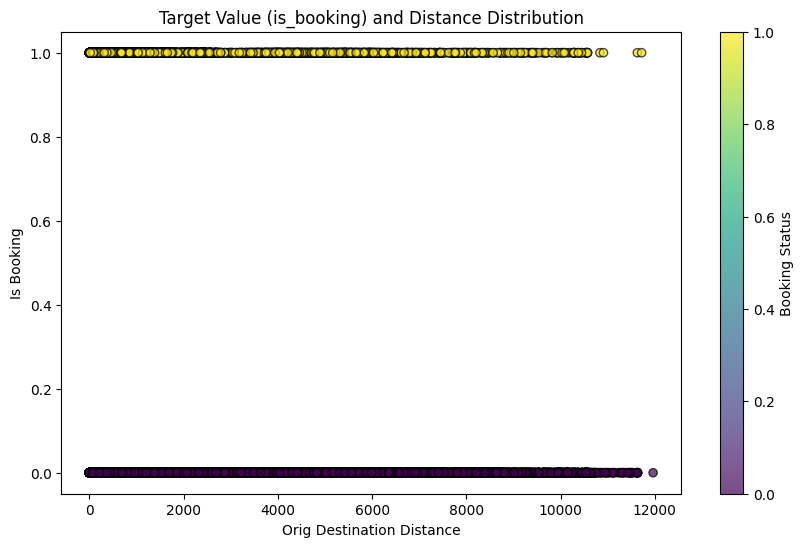

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df['orig_destination_distance'],
    df['is_booking'],
    c=df['is_booking'],
    cmap='viridis',
    alpha=0.7,
    edgecolors='k'
)


plt.title("Target Value (is_booking) and Distance Distribution")
plt.xlabel("Orig Destination Distance")
plt.ylabel("Is Booking")
plt.colorbar(label="Booking Status")
plt.show()

Grafik menunjukkan hubungan antara jarak asal ke tujuan dengan status pemesanan (is_booking). Pemesanan lebih sering terjadi pada jarak pendek hingga menengah, yang ditunjukkan oleh konsentrasi data di bagian awal sumbu X. Sementara itu, pemesanan pada jarak yang sangat jauh (>10.000) jarang terjadi dan terlihat sebagai outliers. Hal ini mengindikasikan bahwa jarak memiliki pengaruh signifikan terhadap keputusan pemesanan, dengan tren yang lebih mendukung destinasi jarak pendek. Data ini relevan untuk strategi pemasaran, khususnya dalam mendorong pemesanan jarak jauh.

Total Number of Reservations by Booking Status

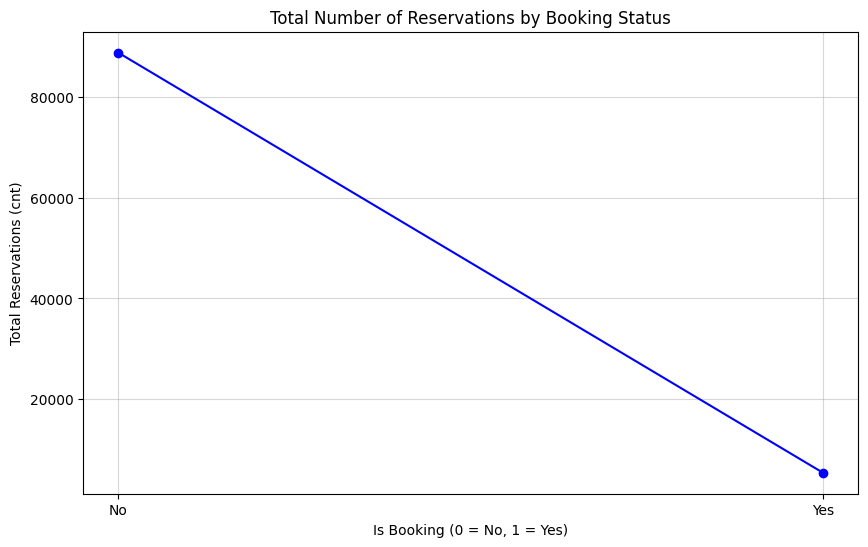

In [49]:
grouped_df = df.groupby('is_booking')['cnt'].sum()


plt.figure(figsize=(10, 6))
plt.plot(grouped_df.index, grouped_df.values, marker='o', linestyle='-', color='b')


plt.title("Total Number of Reservations by Booking Status")
plt.xlabel("Is Booking (0 = No, 1 = Yes)")
plt.ylabel("Total Reservations (cnt)")
plt.xticks([0, 1], labels=["No", "Yes"])
plt.grid(alpha=0.5)
plt.show()

Grafik menunjukkan total jumlah reservasi berdasarkan status pemesanan (is_booking). Sebagian besar data didominasi oleh status "No" (tidak ada pemesanan), dengan lebih dari 80.000 reservasi yang tidak berlanjut menjadi booking. Sebaliknya, jumlah pemesanan berhasil ("Yes") jauh lebih sedikit. Hal ini mengindikasikan adanya tingkat konversi yang rendah, yang mungkin disebabkan oleh faktor seperti jarak, harga, atau preferensi pelanggan. Analisis lebih lanjut diperlukan untuk mengidentifikasi penyebab dan meningkatkan konversi.

Total Reservations by Hotel Country

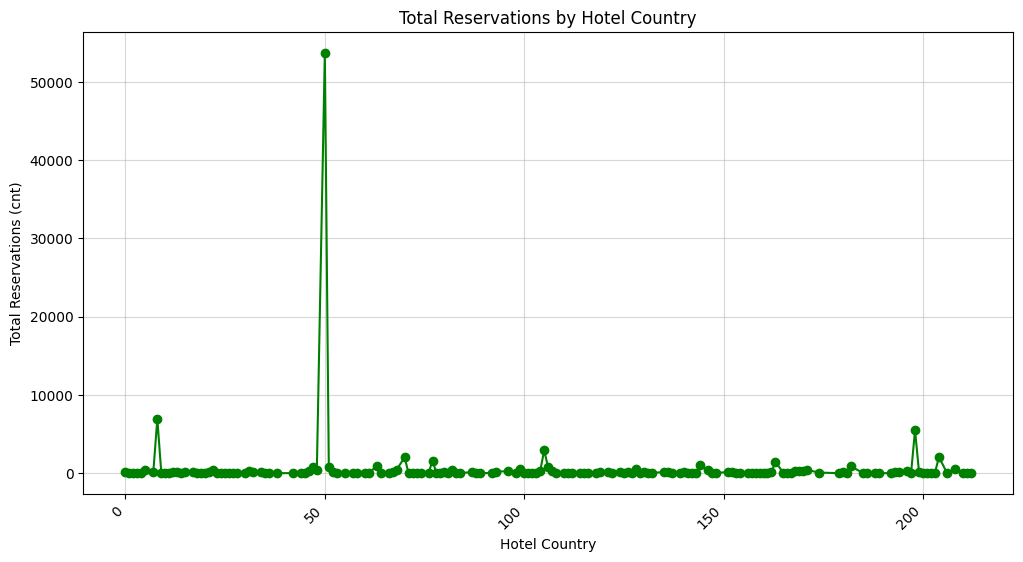

In [50]:
grouped_df = df.groupby('hotel_country')['cnt'].sum()


plt.figure(figsize=(12, 6))
plt.plot(grouped_df.index, grouped_df.values, marker='o', linestyle='-', color='g')


plt.title("Total Reservations by Hotel Country")
plt.xlabel("Hotel Country")
plt.ylabel("Total Reservations (cnt)")
plt.grid(alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.show()

Grafik menunjukkan distribusi total reservasi berdasarkan negara hotel (Hotel Country). Terlihat bahwa mayoritas reservasi terkonsentrasi di satu negara tertentu (dengan kode sekitar 50), yang memiliki lebih dari 50.000 reservasi. Negara-negara lainnya memiliki jumlah reservasi yang jauh lebih kecil, bahkan mendekati nol untuk sebagian besar. Hal ini mengindikasikan bahwa satu negara mendominasi pemesanan hotel, yang mungkin disebabkan oleh popularitas tujuan wisata atau jumlah hotel yang lebih tinggi dibandingkan negara lain. Analisis lebih lanjut dapat dilakukan untuk memahami faktor-faktor yang memengaruhi dominasi ini.